In [5]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

In [21]:
df = pd.read_csv('data_cleaned_translated_dummified.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [22]:
df.columns

Index(['topic', 'usage situation', 'type of business', 'review date',
       'overall rating', 'review', 'number of accounts used',
       'effects after introducing the service', 'rate ease of use',
       'rate helpfulness', 'rate customizability',
       'rate functional satisfaction', 'rate service stability'],
      dtype='object')

In [16]:
df.head(2)

,Unnamed: 0,topic,usage situation,type of business,review date,overall rating,review,number of accounts used,effects after introducing the service,rate ease of use,rate helpfulness,rate customizability,rate functional satisfaction,rate service stability
0,0,Great job on customer support,using,Consulting Service,2022-07-28,4,You can manage the history of previous interac...,>201-300,"In the past, sales management and personnel ma...",4.0,4.0,4.0,4.0,4.0
1,1,You can share customer management in one app.,using,IT related Service,2022-07-28,5,By collectively managing internal customer inf...,>51-100,"Conversations, reactions and characteristics w...",4.0,4.0,5.0,5.0,4.0


### NLP

In [14]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [23]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['topic']=df['topic'].apply(remove_special_characters)
df['review']=df['review'].apply(remove_special_characters)
df['effects after introducing the service']=df['effects after introducing the service'].apply(remove_special_characters)

In [24]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


df['topic']=df['topic'].apply(lemmatize_text)
df['review']=df['review'].apply(lemmatize_text)
df['effects after introducing the service']=df['effects after introducing the service'].apply(lemmatize_text)

In [25]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


df['topic']=df['topic'].apply(remove_stopwords)
df['review']=df['review'].apply(remove_stopwords)
df['effects after introducing the service']=df['effects after introducing the service'].apply(remove_stopwords)

{'didn', 'its', 'again', 'me', 'but', 'don', 'now', 'through', "isn't", 'won', 'off', 'down', "aren't", 'why', 'here', 'only', 'himself', 'by', 'hasn', 'nor', 'he', "you're", 'then', 'between', 'you', 'has', "hasn't", 'very', 'too', 'does', 'she', 'on', 'am', 'i', 'couldn', 'shan', "you'll", 'both', 'where', "weren't", 'my', 'over', 'the', 'they', 'those', 'mustn', 'wasn', 'your', 'who', 'if', "needn't", "wasn't", 'as', "mightn't", 'before', 'theirs', 'should', 'other', 'just', 'ourselves', 'below', 'until', "she's", 'll', 'yours', 'during', 'more', 'all', 'be', 'having', 'haven', 'than', 'hers', 'weren', 'a', 'ain', "doesn't", 'once', "won't", 're', 'myself', 'did', 'and', 'themselves', 'in', "shouldn't", 'our', 'these', 'doing', 'needn', 'to', 'each', 'few', 'no', 'mightn', 'after', "wouldn't", 'them', "couldn't", 'most', 'some', 'ours', 'aren', 'it', 'whom', 'so', "don't", 'have', 'had', 'not', "shan't", 'are', 'against', 'm', 'is', 'further', 'out', "hadn't", 'her', 'while', 'do', 

### Visualizations

In [ ]:
df.groupby()

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


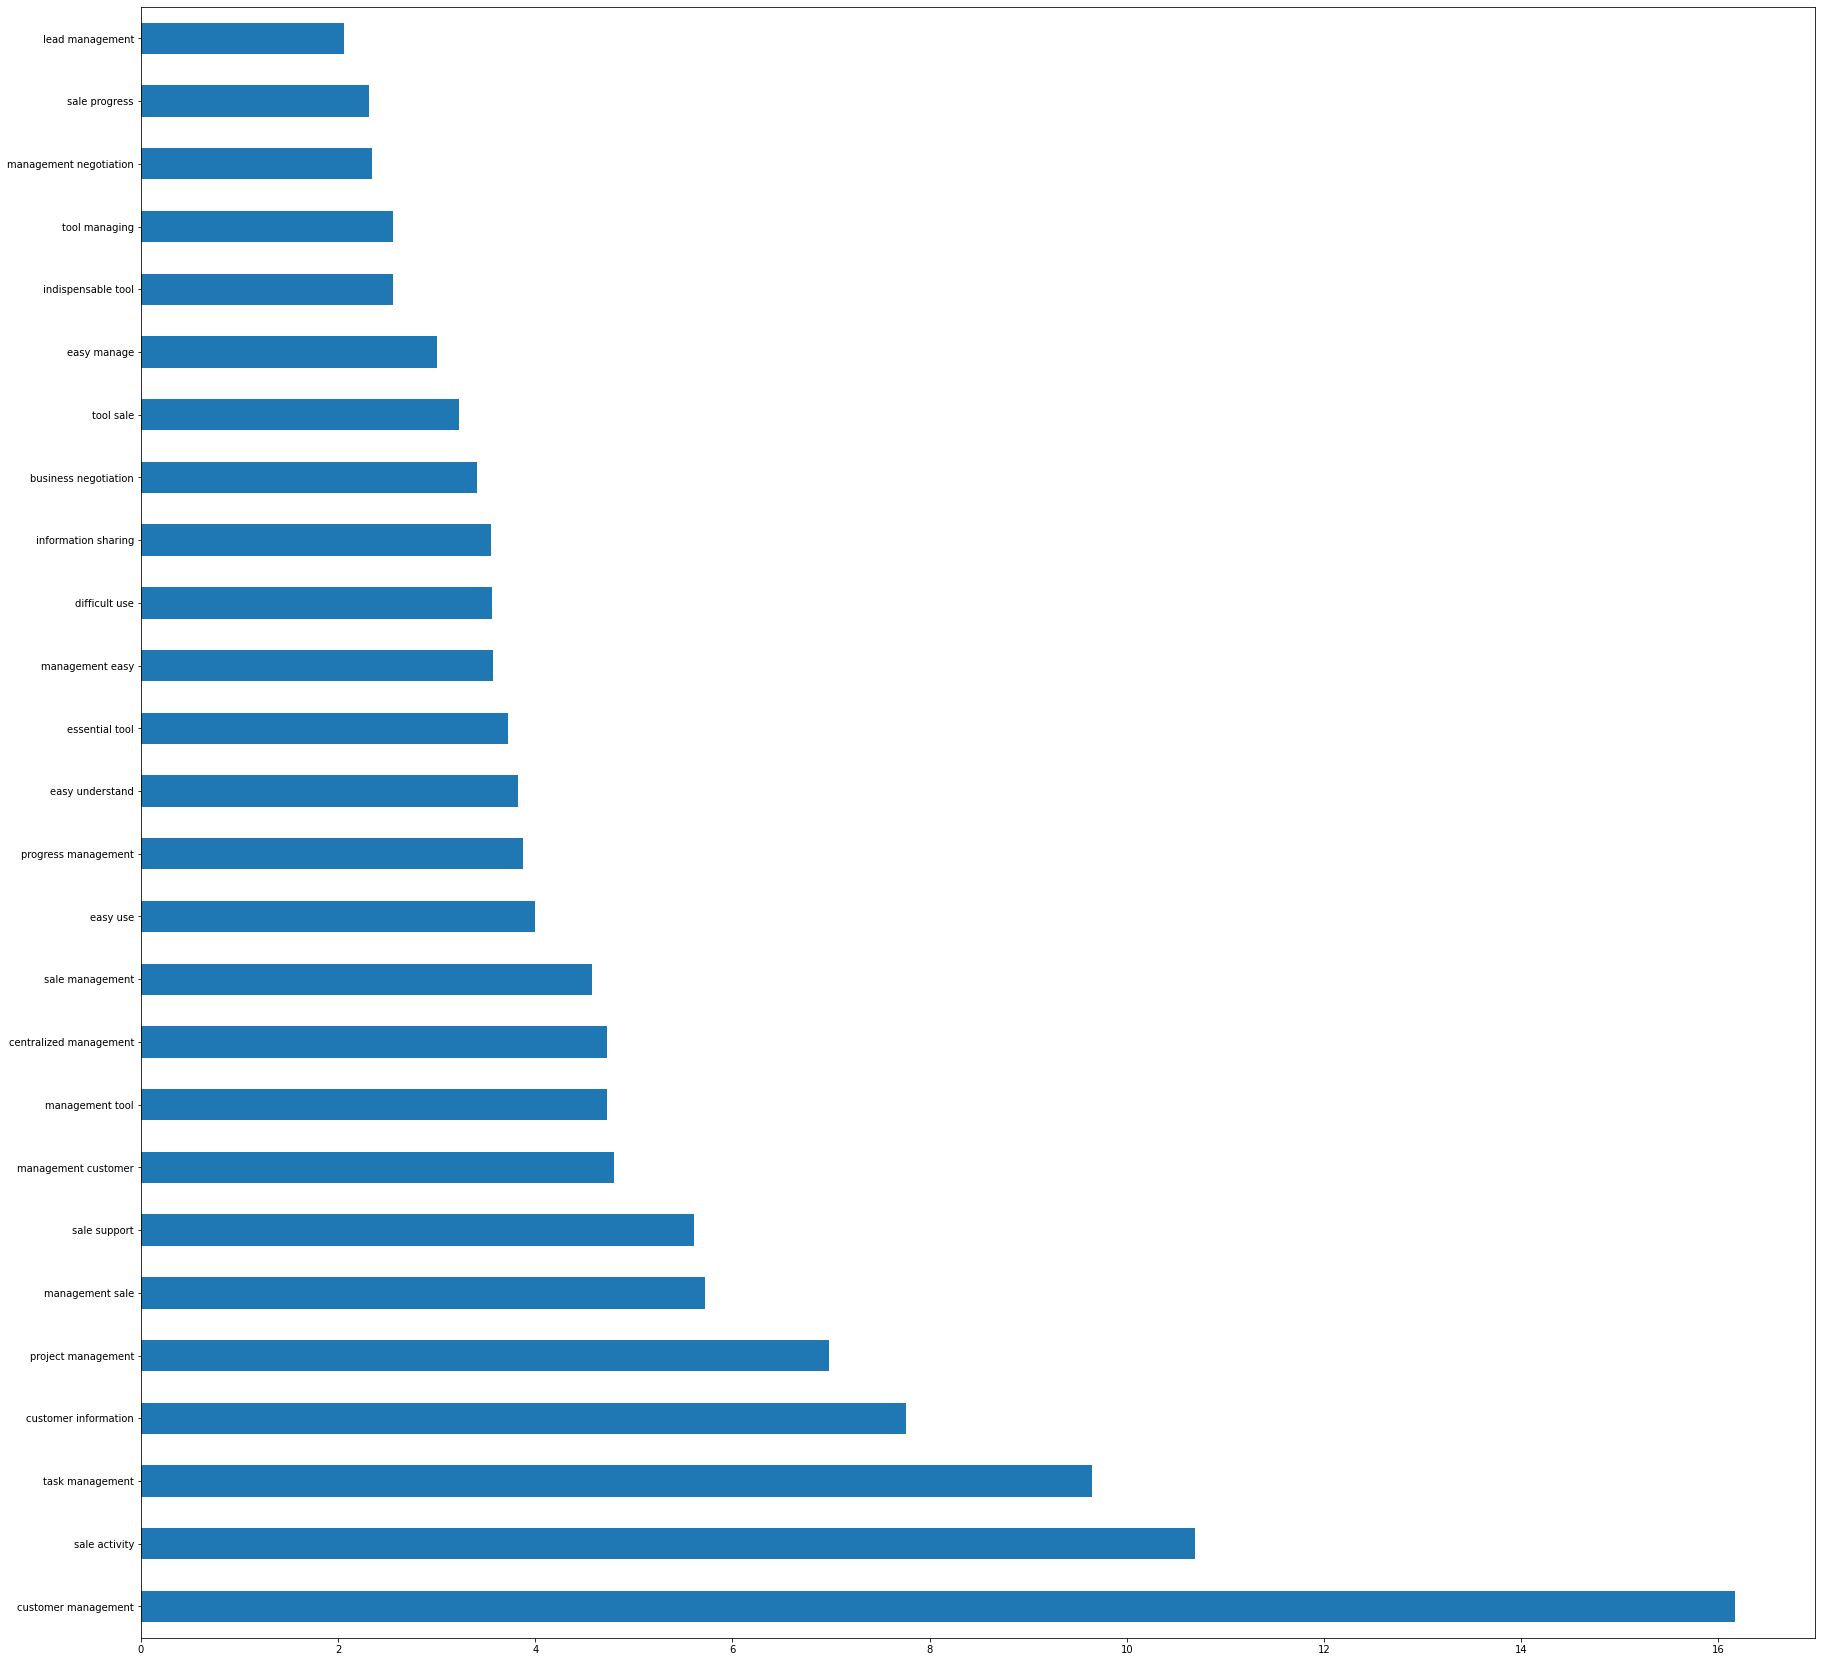

In [30]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
tf.fit(df['topic'])

pro_tf = tf.transform(df['topic'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)